In [1]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder


In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
import keras
from keras.layers import Dense

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


Using TensorFlow backend.


In [4]:
from augmentdata import data_augment

In [5]:
def check_cm_others(y_actual,y_predict):
    from sklearn.metrics import confusion_matrix

    cm1 = confusion_matrix(y_actual,y_predict)
#     print('Confusion Matrix : \n', cm1)

    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
#     print ('Accuracy : ', accuracy1)

    tn=cm1[0,0]
    fp=cm1[0,1]
    fn=cm1[1,0]
    tp=cm1[1,1]

    sensitivity1 = tp/(tp+fn)
#     print('Sensitivity : ', sensitivity1 )

    specificity1 = tn/(tn+fp)
#     print('Specificity : ', specificity1)
    recall=sensitivity1
    precision=tp/(tp+fp)

#     print("Precision = ",precision)
#     print("Recall = ",recall)

    f1_score=2*(precision*recall)/(precision+recall)

#     print("F1 score = ",f1_score)

    return sensitivity1,specificity1,f1_score

def create_model(weight_path,input_dim):
    
    checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
    callbacks_list = [checkpoint]
    model=None
    model = Sequential()
    model.add(Dense(20, input_dim=input_dim, 
                activation='relu')) 

    model.add(Dense(20, 
                activation='relu'))
    model.add(Dense(20, 
                activation='relu'))

    model.add(Dense(20, 
                activation='relu'))

    model.add(Dense(20, 
                activation='relu'))
    model.add(Dense(20, 
                activation='relu'))

    model.add(Dense(2, 
                activation='softmax'))
    opt=keras.optimizers.Adam(lr=.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)



    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model, callbacks_list
    
    

    

### Data pre processing

#### Attribute Information:

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts) 

In [6]:
columns=["Age","Gender","TB","DB","AAP","Sgpt","Sgot","TP","ALB","AG_Ratio","Class"]

In [7]:
df=pd.read_csv("data/ilpd.csv",names=columns)

In [8]:
label_encoder = LabelEncoder()

df['Gender'] = df['Gender'].astype(str)
df.Gender = label_encoder.fit_transform(df["Gender"])


In [9]:
for index,row in df.iterrows():
    if row["Class"] == 1:
        df.at[index,'Class'] = 0
    elif row["Class"] == 2:
        df.at[index,'Class'] = 1

In [10]:
df.shape

(583, 11)

In [11]:
df.head()

,Age,Gender,TB,DB,AAP,Sgpt,Sgot,TP,ALB,AG_Ratio,Class
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [12]:
df["Class"].value_counts()

0    416
1    167
Name: Class, dtype: int64

In [13]:
df.dtypes

Age           int64
Gender        int64
TB          float64
DB          float64
AAP           int64
Sgpt          int64
Sgot          int64
TP          float64
ALB         float64
AG_Ratio    float64
Class         int64
dtype: object

In [14]:
# df=df.fillna(0)

In [15]:
df.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
AAP         0
Sgpt        0
Sgot        0
TP          0
ALB         0
AG_Ratio    4
Class       0
dtype: int64

In [16]:
df["AG_Ratio"]=df["AG_Ratio"].fillna(df["AG_Ratio"].mean())

In [17]:
df.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
AAP         0
Sgpt        0
Sgot        0
TP          0
ALB         0
AG_Ratio    0
Class       0
dtype: int64

In [18]:
# here take 20% out for testing
np.random.seed(41)
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [19]:
print(len(test))
print(len(train))
print(test.shape)
print(train.shape)

106
477
(106, 11)
(477, 11)


In [20]:
print(test["Class"].value_counts())
print(train["Class"].value_counts())


0    74
1    32
Name: Class, dtype: int64
0    342
1    135
Name: Class, dtype: int64


In [21]:
columns=df.columns
print(columns)

Index(['Age', 'Gender', 'TB', 'DB', 'AAP', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'AG_Ratio', 'Class'],
      dtype='object')


### Train with no augmentation

In [23]:
results={}

In [23]:
smote_results={}
adasyn_results={}

(477, 10)
Training MLP
Time taken to train =  15


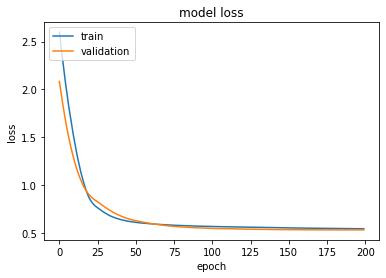

used model and loaded weights from file
Trying MLP
106/106 [==============================] - 0s 342us/step
Accuracy: 67.92
RF


/lustre/gfxhome/asislam25/.conda/envs/venv_vasic_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


GNB
SVM


/lustre/gfxhome/asislam25/.conda/envs/venv_vasic_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


In [24]:
results["0"]={}
smote_results["0"]={}
adasyn_results["0"]={}
source=train[train.columns[:-1]]
print(source.shape)


weight_path="weights/wt1.hdf5"
model,callbacks_list=create_model(weight_path,source.shape[1])
target = list(train["Class"])
target=pd.get_dummies(target)
start=time.time()
print("Training MLP")
history = model.fit(source.values, target,epochs=200,validation_split=0.2,callbacks=callbacks_list,verbose=0)
end=time.time()
difference = int(end - start)
print("Time taken to train = ",difference)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

# load weights
model.load_weights(weight_path)
# Compile model (required to make predictions)
opt=keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print("used model and loaded weights from file")

print("Trying MLP")
results["0"]["MLP"]={}
smote_results["0"]["MLP"]={}
adasyn_results["0"]["MLP"]={}

y_actual = list(test["Class"])
y_actual=pd.get_dummies(y_actual)
test_features_only=test[test.columns[:-1]]
_, accuracy = model.evaluate(test_features_only.values, y_actual)
print('Accuracy: %.2f' % (accuracy*100))

y_actual = test["Class"].astype(int)
y_actual=np.asarray(y_actual)
y_predict=model.predict_classes(test_features_only.values)
sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
results["0"]["MLP"]["F1"]=f1_score
results["0"]["MLP"]["sensitivity"]=sensitivity
results["0"]["MLP"]["specificity"]=specificity

smote_results["0"]["MLP"]["F1"]=f1_score  
smote_results["0"]["MLP"]["sensitivity"]=sensitivity
smote_results["0"]["MLP"]["specificity"]=specificity

adasyn_results["0"]["MLP"]["F1"]=f1_score  
adasyn_results["0"]["MLP"]["sensitivity"]=sensitivity
adasyn_results["0"]["MLP"]["specificity"]=specificity


# for other classifiers
target = list(train["Class"])

# Random forest
print("RF")
results["0"]["RF"]={}
smote_results["0"]["RF"]={}
adasyn_results["0"]["RF"]={}

clf=RandomForestClassifier()
clf.fit(source.values,target)
y_pred=None
y_predict=clf.predict(test_features_only.values)
sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
results["0"]["RF"]["F1"]=f1_score
results["0"]["RF"]["sensitivity"]=sensitivity
results["0"]["RF"]["specificity"]=specificity

smote_results["0"]["RF"]["F1"]=f1_score  
smote_results["0"]["RF"]["sensitivity"]=sensitivity
smote_results["0"]["RF"]["specificity"]=specificity

adasyn_results["0"]["RF"]["F1"]=f1_score  
adasyn_results["0"]["RF"]["sensitivity"]=sensitivity
adasyn_results["0"]["RF"]["specificity"]=specificity

#     Gaussian NB
gnb = GaussianNB()
results["0"]["GNB"]={}
smote_results["0"]["GNB"]={}
adasyn_results["0"]["GNB"]={}

print("GNB")
gnb.fit(source.values,target)
y_predict = gnb.predict(test_features_only.values)
sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
results["0"]["GNB"]["F1"]=f1_score
results["0"]["GNB"]["sensitivity"]=sensitivity
results["0"]["GNB"]["specificity"]=specificity

smote_results["0"]["GNB"]["F1"]=f1_score  
smote_results["0"]["GNB"]["sensitivity"]=sensitivity
smote_results["0"]["GNB"]["specificity"]=specificity

adasyn_results["0"]["GNB"]["F1"]=f1_score  
adasyn_results["0"]["GNB"]["sensitivity"]=sensitivity
adasyn_results["0"]["GNB"]["specificity"]=specificity

#     SVM
clf = svm.SVC()
results["0"]["SVM"]={}
smote_results["0"]["SVM"]={}
adasyn_results["0"]["SVM"]={}

print("SVM")
clf.fit(source.values,target)
y_predict=clf.predict(test_features_only.values)
sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
results["0"]["SVM"]["F1"]=f1_score
results["0"]["SVM"]["sensitivity"]=sensitivity
results["0"]["SVM"]["specificity"]=specificity

smote_results["0"]["SVM"]["F1"]=f1_score  
smote_results["0"]["SVM"]["sensitivity"]=sensitivity
smote_results["0"]["SVM"]["specificity"]=specificity

adasyn_results["0"]["SVM"]["F1"]=f1_score  
adasyn_results["0"]["SVM"]["sensitivity"]=sensitivity
adasyn_results["0"]["SVM"]["specificity"]=specificity






In [25]:
results

{'0': {'MLP': {'F1': nan,
   'sensitivity': 0.0,
   'specificity': 0.972972972972973},
  'RF': {'F1': 0.49056603773584906,
   'sensitivity': 0.40625,
   'specificity': 0.8918918918918919},
  'GNB': {'F1': 0.6138613861386139,
   'sensitivity': 0.96875,
   'specificity': 0.4864864864864865},
  'SVM': {'F1': nan, 'sensitivity': 0.0, 'specificity': 1.0}}}

In [26]:
smote_results

{'0': {'MLP': {'F1': nan,
   'sensitivity': 0.0,
   'specificity': 0.972972972972973},
  'RF': {'F1': 0.49056603773584906,
   'sensitivity': 0.40625,
   'specificity': 0.8918918918918919},
  'GNB': {'F1': 0.6138613861386139,
   'sensitivity': 0.96875,
   'specificity': 0.4864864864864865},
  'SVM': {'F1': nan, 'sensitivity': 0.0, 'specificity': 1.0}}}

In [27]:
adasyn_results

{'0': {'MLP': {'F1': nan,
   'sensitivity': 0.0,
   'specificity': 0.972972972972973},
  'RF': {'F1': 0.49056603773584906,
   'sensitivity': 0.40625,
   'specificity': 0.8918918918918919},
  'GNB': {'F1': 0.6138613861386139,
   'sensitivity': 0.96875,
   'specificity': 0.4864864864864865},
  'SVM': {'F1': nan, 'sensitivity': 0.0, 'specificity': 1.0}}}

In [28]:
train["Class"].value_counts()

0    342
1    135
Name: Class, dtype: int64

### Train  with augmentation

In [ ]:
N_range=[50,100,198]
for N in N_range:
    results[N]={}
    smote_results[N]={}
    adasyn_results[N]={}
    
    k_range=[1,2,5,10]
    for k in k_range:
        results[N][k]={}
        smote_results[N][k]={}  
        adasyn_results[N][k]={}
        
        results[N][k]["MLP"]={}
        smote_results[N][k]["MLP"]={}  
        adasyn_results[N][k]["MLP"]={}

        results[N][k]["RF"]={}
        smote_results[N][k]["RF"]={}  
        adasyn_results[N][k]["RF"]={}
        
        results[N][k]["GNB"]={}
        smote_results[N][k]["GNB"]={}  
        adasyn_results[N][k]["GNB"]={}

        results[N][k]["SVM"]={}
        smote_results[N][k]["SVM"]={}  
        adasyn_results[N][k]["SVM"]={}


        class_index=1
        randmx=.001
        dist_percent=0.2

        
        daug = data_augment.DataAugment()
        print("randmx = ",randmx)
        now = time.time()
        [Data_a,Ext_d,Ext_not]=daug.augment(data=train.values,k=k,class_ind=class_index,N=N,
                                            randmx=randmx,dist_percent=dist_percent)
        later = time.time()
        difference = int(later - now)
        print("Time taken to augment = ",difference)
        print(len(Data_a))

        train_aug=pd.DataFrame(data=Data_a,index=None,    # values                
                columns=columns)      

        print("After augmentation of ",N," items with ",k," neighbors")

        print(train_aug["Class"].value_counts())
        source=train_aug[train_aug.columns[:-1]]
        target = list(train_aug["Class"])
        target=pd.get_dummies(target)
        
#         # going for DNN

#         weight_path="weights/"+str(N)+"_"+str(k)+"_wt1.hdf5"    
#         model,callbacks_list=create_model(weight_path,source.shape[1])
#         start=time.time()
#         print("Training model for N = ",N," k = ",k)
#         history = model.fit(source.values, target,epochs=200,validation_split=0.2,callbacks=callbacks_list,verbose=0)
#         end=time.time()
#         difference = int(end - start)
#         print("Time taken to train = ",difference)



#         plt.plot(history.history['loss'])
#         plt.plot(history.history['val_loss'])
#         plt.title('model loss')
#         plt.ylabel('loss')
#         plt.xlabel('epoch')
#         plt.legend(['train','validation'], loc='upper left')
#         plt.show()    

#         # load weights
#         model.load_weights(weight_path)
#         # Compile model (required to make predictions)
#         opt=keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#         model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#         print("used model and loaded weights from file")    
#         print("Test distribution")
#         print(test["Class"].value_counts())
#         print("Trying MLP")
#         y_actual = list(test["Class"])
#         y_actual=pd.get_dummies(y_actual)
#         test_features_only=test[test.columns[:-1]]
#         _, accuracy = model.evaluate(test_features_only.values, y_actual)
#         print('Accuracy: %.2f' % (accuracy*100))            


#         y_actual = test["Class"].astype(int)
#         y_actual=np.asarray(y_actual)
#         y_predict=model.predict_classes(test_features_only.values)
#         sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
#         results[N][k]["MLP"]["F1"]=f1_score 
#         results[N][k]["MLP"]["sensitivity"]=sensitivity 
#         results[N][k]["MLP"]["specificity"]=specificity         
        


        # for other classifiers
        target = list(train_aug["Class"])
        source=train_aug[train_aug.columns[:-1]]
        test_features_only=test[test.columns[:-1]]

        # Random forest
#         print("RF")
#         clf=RandomForestClassifier()
#         clf.fit(source.values,target)
#         y_predict=clf.predict(test_features_only.values)
#         sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
#         results[N][k]["RF"]["F1"]=f1_score 
#         results[N][k]["RF"]["sensitivity"]=sensitivity 
#         results[N][k]["RF"]["specificity"]=specificity         
                

    #     Gaussian NB
        print("GNB")
        gnb = GaussianNB()
        gnb.fit(source.values,target)
        y_predict = gnb.predict(test_features_only.values)
        sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
        results[N][k]["GNB"]["F1"]=f1_score 
        results[N][k]["GNB"]["sensitivity"]=sensitivity 
        results[N][k]["GNB"]["specificity"]=specificity         
                        
        

    #     SVM
#         print("SVM")
#         clf = svm.SVC()
#         clf.fit(source.values,target)
#         y_predict=clf.predict(test_features_only.values)
#         sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
#         results[N][k]["SVM"]["F1"]=f1_score 
#         results[N][k]["SVM"]["sensitivity"]=sensitivity 
#         results[N][k]["SVM"]["specificity"]=specificity         
                                
        
        
        
        # this part for SMOTE
        print("******Starting SMOTE***********")
        source=train[train.columns[:-1]]
        print("Shape of training ",source.shape)

        y_train=train["Class"].values
        num_minority=sum(y_train==class_index)
        num_majority=len(y_train)-num_minority
        print(num_majority,num_minority)
        
        samp_strategy=(num_minority+N)/num_majority
        print(samp_strategy)
        now = time.time()
        sm = SMOTE(random_state=2,k_neighbors=k,sampling_strategy=samp_strategy)
        X_train_res, y_train_res = sm.fit_sample(source, y_train.ravel())
        source=X_train_res

        later = time.time()
        difference = int(later - now)
        print("Time taken to augment by SMOTE = ",difference)

        print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
        print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

        print("After OverSampling, counts of label {}: {}".format(class_index,sum(y_train_res==1)))
        print("After OverSampling, counts of other label: {}".format(len(y_train_res)-sum(y_train_res==class_index)))  
        
        # starting dnn
#         weight_path="weights/smote"+"_"+str(N)+"_"+str(k)+"_wt1.hdf5"    
#         model,callbacks_list=create_model(weight_path,X_train_res.shape[1])
#         start=time.time()
#         print("Training model")
#         target=pd.get_dummies(y_train_res)
#         history = model.fit(X_train_res.values, target,epochs=200,validation_split=0.2,callbacks=callbacks_list,verbose=0)
#         end=time.time()
#         difference = int(end - start)
#         print("Time taken to train = ",difference) 

#         plt.plot(history.history['loss'])
#         plt.plot(history.history['val_loss'])
#         plt.title('model loss')
#         plt.ylabel('loss')
#         plt.xlabel('epoch')
#         plt.legend(['train','validation'], loc='upper left')
#         plt.show()

        

#         # load weights
#         model.load_weights(weight_path)
#         # Compile model (required to make predictions)
#         opt=keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#         model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#         print("used model and loaded weights from file")    
#         print("Trying MLP")
#         y_actual = list(test["Class"])
#         y_actual=pd.get_dummies(y_actual)
#         test_features_only=test[test.columns[:-1]]
#         _, accuracy = model.evaluate(test_features_only.values, y_actual)
#         print('Accuracy: %.2f' % (accuracy*100)) 



#         y_actual = test["Class"].astype(int)
#         y_actual=np.asarray(y_actual)
#         y_predict=model.predict_classes(test_features_only.values)
#         sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
#         smote_results[N][k]["MLP"]["F1"]=f1_score         
#         smote_results[N][k]["MLP"]["sensitivity"]=sensitivity                 
#         smote_results[N][k]["MLP"]["specificity"]=specificity                 

        # for other classifiers
        target = y_train_res
        source=X_train_res
        test_features_only=test[test.columns[:-1]]

        # Random forest
#         print("RF")
#         clf=RandomForestClassifier()
#         clf.fit(source.values,target)
#         y_predict=clf.predict(test_features_only.values)
#         sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
#         smote_results[N][k]["RF"]["F1"]=f1_score         
#         smote_results[N][k]["RF"]["sensitivity"]=sensitivity                 
#         smote_results[N][k]["RF"]["specificity"]=specificity

    #     Gaussian NB
        print("GNB")
        gnb = GaussianNB()
        gnb.fit(source.values,target)
        y_predict = gnb.predict(test_features_only.values)
        sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
        smote_results[N][k]["GNB"]["F1"]=f1_score         
        smote_results[N][k]["GNB"]["sensitivity"]=sensitivity                 
        smote_results[N][k]["GNB"]["specificity"]=specificity

    #     SVM
#         print("SVM")
#         clf = svm.SVC()
#         clf.fit(source.values,target)
#         y_predict=clf.predict(test_features_only.values)
#         sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
#         smote_results[N][k]["SVM"]["F1"]=f1_score         
#         smote_results[N][k]["SVM"]["sensitivity"]=sensitivity                 
#         smote_results[N][k]["SVM"]["specificity"]=specificity

        
        
        
        
        # this part for ADASYN
        print("******Starting ADASYN***********")
        source=train[train.columns[:-1]]
        print("Shape of training ",source.shape)

        y_train=train["Class"].values
        num_minority=sum(y_train==class_index)
        num_majority=len(y_train)-num_minority
        print(num_majority,num_minority)
        
        samp_strategy=(num_minority+N)/num_majority
        print(samp_strategy)
        now = time.time()
        ad = ADASYN(random_state=2,n_neighbors=k,sampling_strategy=samp_strategy)
        X_train_res, y_train_res = ad.fit_sample(source, y_train.ravel())
        source=X_train_res

        later = time.time()
        difference = int(later - now)
        print("Time taken to augment by ADASYN = ",difference)

        print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
        print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

        print("After OverSampling, counts of label {}: {}".format(class_index,sum(y_train_res==1)))
        print("After OverSampling, counts of other label: {}".format(len(y_train_res)-sum(y_train_res==class_index)))  
        
        weight_path="weights/adasyn"+"_"+str(N)+"_"+str(k)+"_wt1.hdf5"    
        model,callbacks_list=create_model(weight_path,X_train_res.shape[1])
        start=time.time()
        print("Training model")
        target=pd.get_dummies(y_train_res)
        history = model.fit(X_train_res.values, target,epochs=200,validation_split=0.2,callbacks=callbacks_list,verbose=0)
        end=time.time()
        difference = int(end - start)
        print("Time taken to train = ",difference) 

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train','validation'], loc='upper left')
        plt.show()

        

        # load weights
        model.load_weights(weight_path)
        # Compile model (required to make predictions)
        opt=keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

        print("used model and loaded weights from file")    
        print("Trying MLP")
        y_actual = list(test["Class"])
        y_actual=pd.get_dummies(y_actual)
        test_features_only=test[test.columns[:-1]]
        _, accuracy = model.evaluate(test_features_only.values, y_actual)
        print('Accuracy: %.2f' % (accuracy*100)) 



        y_actual = test["Class"].astype(int)
        y_actual=np.asarray(y_actual)
        y_predict=model.predict_classes(test_features_only.values)
        sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
        adasyn_results[N][k]["MLP"]["F1"]=f1_score         
        adasyn_results[N][k]["MLP"]["sensitivity"]=sensitivity                 
        adasyn_results[N][k]["MLP"]["specificity"]=specificity

        # for other classifiers
        target = y_train_res
        source=X_train_res
        test_features_only=test[test.columns[:-1]]

        # Random forest
        print("RF")
        clf=RandomForestClassifier()
        clf.fit(source.values,target)
        y_predict=clf.predict(test_features_only.values)
        sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
        adasyn_results[N][k]["RF"]["F1"]=f1_score         
        adasyn_results[N][k]["RF"]["sensitivity"]=sensitivity                 
        adasyn_results[N][k]["RF"]["specificity"]=specificity

    #     Gaussian NB
        print("GNB")
        gnb = GaussianNB()
        gnb.fit(source.values,target)
        y_predict = gnb.predict(test_features_only.values)
        sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
        adasyn_results[N][k]["GNB"]["F1"]=f1_score         
        adasyn_results[N][k]["GNB"]["sensitivity"]=sensitivity                 
        adasyn_results[N][k]["GNB"]["specificity"]=specificity

    #     SVM
        print("SVM")
        clf = svm.SVC()
        clf.fit(source.values,target)
        y_predict=clf.predict(test_features_only.values)
        sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
        adasyn_results[N][k]["SVM"]["F1"]=f1_score         
        adasyn_results[N][k]["SVM"]["sensitivity"]=sensitivity                 
        adasyn_results[N][k]["SVM"]["specificity"]=specificity        
        
        
        



        


In [ ]:
results

In [ ]:
# get best

print("randmx = ",randmx)
print("dist_percent = ",dist_percent)
import math
checks=["MLP","RF","GNB","SVM"]
# checks=["GNB"]

best_n=None
best_k=None
best_sensitivity=0
best_specificity=0
best_f1=0

print("KNNOR")


for check in checks:
    for k,v in results.items():
        if k=="0":
            continue
        for k1,v1 in v.items():
#             print(k1)
#             print(v1)
            if math.isnan(v1[check]["F1"]):
                continue
#             print(v1[check]["F1"])
            if best_f1<v1[check]["F1"]:
                best_f1=v1[check]["F1"]
                best_n=k
                best_k=k1
                best_sensitivity=v1[check]["sensitivity"]
                best_specificity=v1[check]["specificity"]
                

    print(check,best_f1,"[N=",best_n,",k=",best_k,"]")
    print("Sensitivity = ",best_sensitivity)
    print("Specificity = ",best_specificity)    
    
    best_f1=0
    best_k=None
    best_n=None
    best_sensitivity=0
    best_specificity=0



In [ ]:
# get best

print("randmx = ",randmx)
print("dist_percent = ",dist_percent)
import math
checks=["MLP","RF","GNB","SVM"]
# checks=["GNB"]

best_n=None
best_k=None
best_sensitivity=0
best_specificity=0
best_f1=0

print("SMOTE")


for check in checks:
    for k,v in smote_results.items():
        if k=="0":
            continue
        for k1,v1 in v.items():
#             print(k1)
#             print(v1)
            if math.isnan(v1[check]["F1"]):
                continue
#             print(v1[check]["F1"])
            if best_f1<v1[check]["F1"]:
                best_f1=v1[check]["F1"]
                best_n=k
                best_k=k1
                best_sensitivity=v1[check]["sensitivity"]
                best_specificity=v1[check]["specificity"]                

    print(check,best_f1,"[N=",best_n,",k=",best_k,"]")
    print("Sensitivity = ",best_sensitivity)
    print("Specificity = ",best_specificity)
    
    best_f1=0
    best_k=None
    best_n=None
    best_sensitivity=0
    best_specificity=0
    



In [ ]:
# get best

print("randmx = ",randmx)
print("dist_percent = ",dist_percent)
import math
checks=["MLP","RF","GNB","SVM"]
# checks=["GNB"]

best_n=None
best_k=None
best_sensitivity=0
best_specificity=0
best_f1=0

print("ADASYN")


for check in checks:
    for k,v in adasyn_results.items():
        if k=="0":
            continue
        for k1,v1 in v.items():
#             print(k1)
#             print(v1)
            if math.isnan(v1[check]["F1"]):
                continue
#             print(v1[check]["F1"])
            if best_f1<v1[check]["F1"]:
                best_f1=v1[check]["F1"]
                best_n=k
                best_k=k1
                best_sensitivity=v1[check]["sensitivity"]
                best_specificity=v1[check]["specificity"]                

    print(check,best_f1,"[N=",best_n,",k=",best_k,"]")
    print("Sensitivity = ",best_sensitivity)
    print("Specificity = ",best_specificity)
    
    best_f1=0
    best_k=None
    best_n=None
    best_sensitivity=0
    best_specificity=0
    



In [ ]:
# adasyn_results

### below for re training as required

In [31]:
results={}
smote_results={}
adasyn_results={}

# N_range=[50,100,198]
while True:
    N_range=[100]
    for N in N_range:
        results[N]={}
        smote_results[N]={}
        adasyn_results[N]={}

        k_range=[5,10]
#         k_range=[2]
        for k in k_range:
            randmx_range=[0.01,0.05,0.1,0.5,0.9]
        
            for randmx in randmx_range:
                results[N][k]={}
                smote_results[N][k]={}  
                adasyn_results[N][k]={}

                results[N][k]["MLP"]={}
                smote_results[N][k]["MLP"]={}  
                adasyn_results[N][k]["MLP"]={}

                results[N][k]["RF"]={}
                smote_results[N][k]["RF"]={}  
                adasyn_results[N][k]["RF"]={}

                results[N][k]["GNB"]={}
                smote_results[N][k]["GNB"]={}  
                adasyn_results[N][k]["GNB"]={}

                results[N][k]["SVM"]={}
                smote_results[N][k]["SVM"]={}  
                adasyn_results[N][k]["SVM"]={}


                class_index=1
                randmx=1
                dist_percent=0.9


                daug = data_augment.DataAugment()
    #             print("randmx = ",randmx)
                now = time.time()
                [Data_a,Ext_d,Ext_not]=daug.augment(data=train.values,k=k,class_ind=class_index,N=N,
                                                    randmx=randmx,dist_percent=dist_percent)
                later = time.time()
                difference = int(later - now)
    #             print("Time taken to augment = ",difference)
    #             print(len(Data_a))

                train_aug=pd.DataFrame(data=Data_a,index=None,    # values                
                        columns=columns)      

    #             print("After augmentation of ",N," items with ",k," neighbors")

    #             print(train_aug["Class"].value_counts())
                source=train_aug[train_aug.columns[:-1]]
                target = list(train_aug["Class"])
                target=pd.get_dummies(target)

    #             weight_path="weights/"+str(N)+"_"+str(k)+"_wt1.hdf5"    
    #             model,callbacks_list=create_model(weight_path,source.shape[1])
    #             start=time.time()
    #             print("Training model for N = ",N," k = ",k)
    #             history = model.fit(source.values, target,epochs=200,validation_split=0.2,callbacks=callbacks_list,verbose=0)
    #             end=time.time()
    #             difference = int(end - start)
    #             print("Time taken to train = ",difference)



    #             plt.plot(history.history['loss'])
    #             plt.plot(history.history['val_loss'])
    #             plt.title('model loss')
    #             plt.ylabel('loss')
    #             plt.xlabel('epoch')
    #             plt.legend(['train','validation'], loc='upper left')
    #             plt.show()    

    #             # load weights
    #             model.load_weights(weight_path)
    #             # Compile model (required to make predictions)
    #             opt=keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    #             model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    #             print("used model and loaded weights from file")    
    #             print("Test distribution")
    #             print(test["Class"].value_counts())
    #             print("Trying MLP")
    #             y_actual = list(test["Class"])
    #             y_actual=pd.get_dummies(y_actual)
    #             test_features_only=test[test.columns[:-1]]
    #             _, accuracy = model.evaluate(test_features_only.values, y_actual)
    #             print('Accuracy: %.2f' % (accuracy*100))            


                y_actual = test["Class"].astype(int)
                y_actual=np.asarray(y_actual)
    #             y_predict=model.predict_classes(test_features_only.values)
    #             sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
    #             results[N][k]["MLP"]["F1"]=f1_score 
    #             results[N][k]["MLP"]["sensitivity"]=sensitivity 
    #             results[N][k]["MLP"]["specificity"]=specificity         




                # for other classifiers
                target = list(train_aug["Class"])
                source=train_aug[train_aug.columns[:-1]]
                test_features_only=test[test.columns[:-1]]

    #             # Random forest
    #             print("RF")
    #             clf=RandomForestClassifier()
    #             clf.fit(source.values,target)
    #             y_predict=clf.predict(test_features_only.values)
    #             sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
    #             results[N][k]["RF"]["F1"]=f1_score 
    #             results[N][k]["RF"]["sensitivity"]=sensitivity 
    #             results[N][k]["RF"]["specificity"]=specificity         


            #     Gaussian NB
#                 print("GNB")
                gnb = GaussianNB()
                gnb.fit(source.values,target)
                y_predict = gnb.predict(test_features_only.values)
                sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
                results[N][k]["GNB"]["F1"]=f1_score 
                results[N][k]["GNB"]["sensitivity"]=sensitivity 
                results[N][k]["GNB"]["specificity"]=specificity         



            #     SVM
    #             print("SVM")
    #             clf = svm.SVC()
    #             clf.fit(source.values,target)
    #             y_predict=clf.predict(test_features_only.values)
    #             sensitivity,specificity,f1_score=check_cm_others(y_actual,y_predict)
    #             results[N][k]["SVM"]["F1"]=f1_score 
    #             results[N][k]["SVM"]["sensitivity"]=sensitivity 
    #             results[N][k]["SVM"]["specificity"]=specificity         

#                 print("*************************************")
                
                target_f1=62.5
                target_sensitivity=96.8

                if sensitivity>target_sensitivity:
                    print("N=",N)
                    print("k=",k)
                    print("randmx",randmx)
                    print("dist_percent",dist_percent)
                    print("f1",f1_score)
                    print("sensitivity",sensitivity)
                    print("specificity",specificity)
                    print("*************************************")
    #             if f1_score>=.25:
    #                 break



KeyboardInterrupt: 

In [28]:

# get best

print("randmx = ",randmx)
print("dist_percent = ",dist_percent)
import math
# checks=["MLP","RF","GNB","SVM"]
checks=["MLP"]

best_n=None
best_k=None
best_sensitivity=0
best_specificity=0
best_f1=0

print("KNNOR")


for check in checks:
    for k,v in results.items():
        if k=="0":
            continue
        for k1,v1 in v.items():
#             print(k1)
#             print(v1)
            if math.isnan(v1[check]["F1"]):
                continue
#             print(v1[check]["F1"])
            if best_f1<v1[check]["F1"]:
                best_f1=v1[check]["F1"]
                best_n=k
                best_k=k1
                best_sensitivity=v1[check]["sensitivity"]
                best_specificity=v1[check]["specificity"]
                

    print(check,best_f1,"[N=",best_n,",k=",best_k,"]")
    print("Sensitivity = ",best_sensitivity)
    print("Specificity = ",best_specificity)    
    
    best_f1=0
    best_k=None
    best_n=None
    best_sensitivity=0
    best_specificity=0



randmx =  1
dist_percent =  0.9
KNNOR


KeyError: 'F1'